<a href="https://colab.research.google.com/github/Yuvraj-Jaiswal/Image-Segmentation-CNN/blob/main/Img_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d tapakah68/segmentation-full-body-mads-dataset
! unzip segmentation-full-body-mads-dataset.zip

In [ ]:
from PIL import Image
import glob
import numpy as np
import cv2

image_list = []
for filename in glob.glob('/content/segmentation_full_body_mads_dataset_1192_img/images/*'): #assuming gif
    im=cv2.imread(filename)
    im = cv2.resize(im,(224,224))
    im = cv2.cvtColor(im , cv2.COLOR_BGR2RGB)
    im = im/255.0
    flipped = cv2.flip(im, 1)
    image_list.append(im)
    image_list.append(flipped)
image_list = np.array(image_list)

mask_list = []
for filename in glob.glob('/content/segmentation_full_body_mads_dataset_1192_img/masks/*'): #assuming gif
    im=cv2.imread(filename)
    im = cv2.resize(im,(224,224))
    im = cv2.cvtColor(im , cv2.COLOR_BGR2RGB)
    im = im/255.0
    flipped = cv2.flip(im, 1)
    mask_list.append(im)
    mask_list.append(flipped)
mask_list = np.array(mask_list)

In [ ]:
print(len(image_list))
print(len(mask_list))

2384
2384


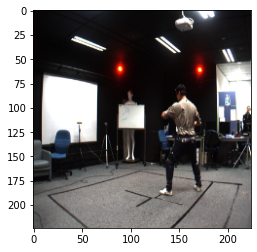

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mask_list[101])
plt.imshow(image_list[100])

In [ ]:
train_im = image_list[220:]
train_mask_im = mask_list[220:]

valid_im = image_list[0:220]
valid_mask_im = mask_list[0:220]

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Conv2DTranspose,InputLayer
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

Shape = 224

model = Sequential()

model.add(InputLayer((Shape,Shape,3)))

model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2DTranspose(filters=128,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2DTranspose(filters=64,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2DTranspose(filters=32,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2DTranspose(filters=16,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same'))

model.add(Conv2DTranspose(filters=3,kernel_size=(7,7),activation='sigmoid',padding='same'))

model.compile(optimizer=Adam(), loss="binary_crossentropy" ,metrics=['accuracy'])

model.fit(train_im, train_mask_im , epochs=100, verbose=1 , validation_data=(valid_im,valid_mask_im))


Epoch 1/100
68/68 [==============================] - 31s 291ms/step - loss: 0.2494 - accuracy: 0.3620 - val_loss: 0.1222 - val_accuracy: 0.4749
Epoch 2/100
68/68 [==============================] - 17s 253ms/step - loss: 0.0913 - accuracy: 0.4549 - val_loss: 0.0643 - val_accuracy: 0.4289
Epoch 3/100
68/68 [==============================] - 17s 252ms/step - loss: 0.0607 - accuracy: 0.3318 - val_loss: 0.0537 - val_accuracy: 0.2971
Epoch 4/100
68/68 [==============================] - 17s 251ms/step - loss: 0.0554 - accuracy: 0.3030 - val_loss: 0.0502 - val_accuracy: 0.3204
Epoch 5/100
68/68 [==============================] - 17s 251ms/step - loss: 0.0500 - accuracy: 0.2981 - val_loss: 0.0484 - val_accuracy: 0.2788
Epoch 6/100
68/68 [==============================] - 17s 258ms/step - loss: 0.0491 - accuracy: 0.2967 - val_loss: 0.0442 - val_accuracy: 0.2913
Epoch 7/100
68/68 [==============================] - 17s 252ms/step - loss: 0.0450 - accuracy: 0.2734 - val_loss: 0.0433 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
del model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


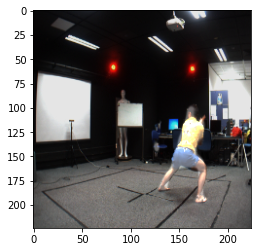

In [ ]:
import matplotlib.pyplot as plt
img_mask = model.predict(image_list[0].reshape(1,224,224,3))
original = image_list[0]
img_mask = img_mask.reshape(224,224,3)
img_mask = np.array(img_mask)
img_mask = np.asarray(img_mask, np.float64)
added_image = cv2.addWeighted(original,0.9,img_mask,0.4,0)
plt.imshow(added_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


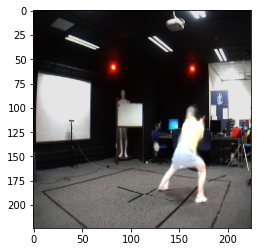

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


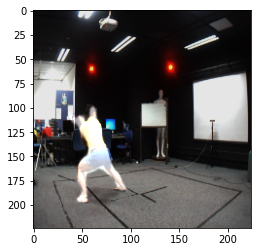

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


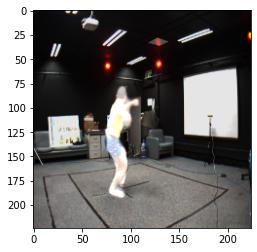

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


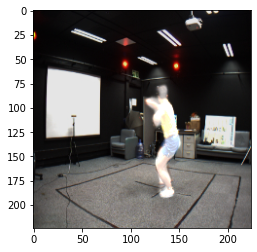

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


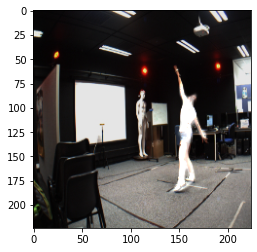

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


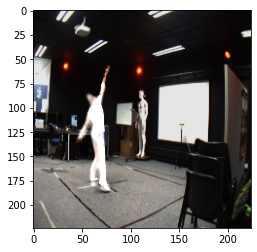

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


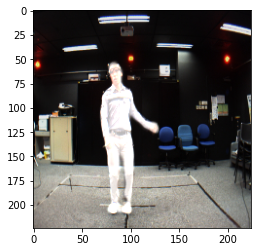

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


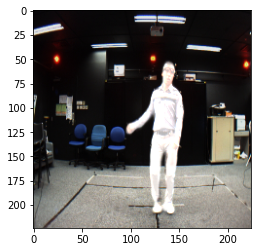

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


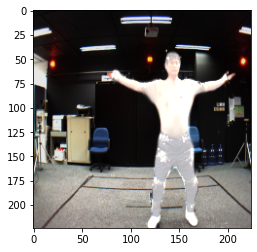

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


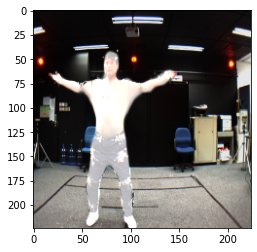

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


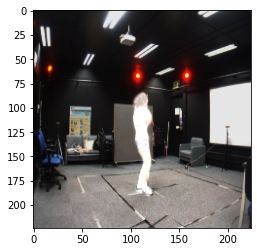

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


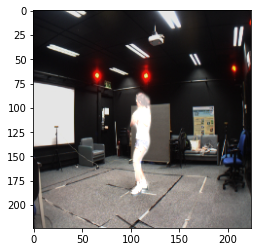

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


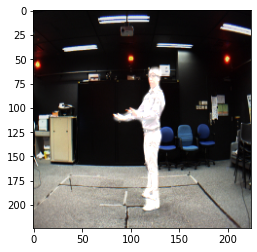

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


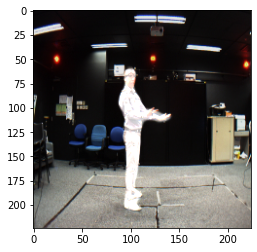

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


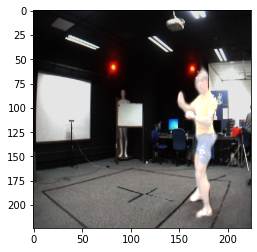

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


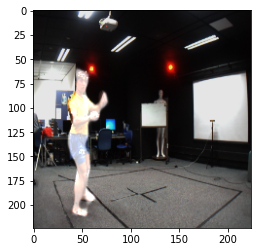

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


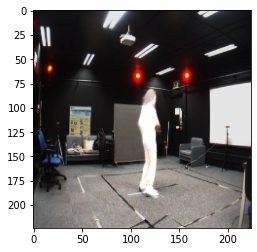

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


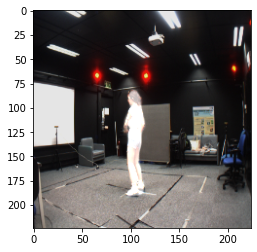

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


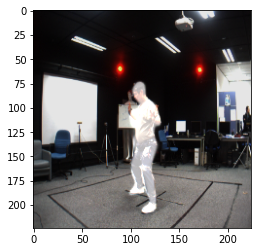

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


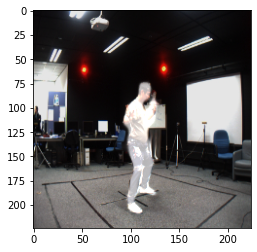

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


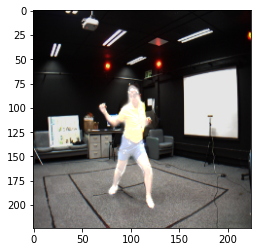

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


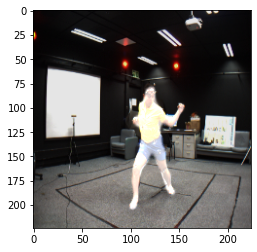

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


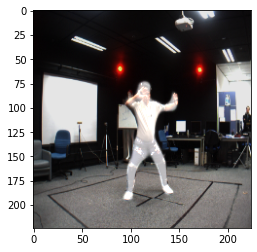

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


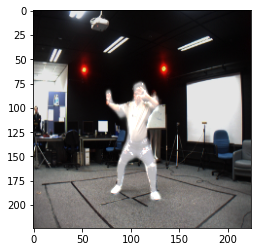

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
for img in image_list:
  img_mask = model.predict(img.reshape(1,224,224,3))
  img_mask = img_mask.reshape(224,224,3)
  img_mask = np.array(img_mask)
  img_mask = np.asarray(img_mask, np.float64)
  added_image = cv2.addWeighted(img,0.9,img_mask,0.7,0)
  plt.imshow(added_image)
  plt.show()

In [ ]:
img = image_list[0]
flipped = cv2.flip(img, 1)
plt.imshow(flipped)
plt.imshow(img)